In [2]:
import h3
from shapely.geometry import Polygon, Point
import random
import folium
import numpy as np
import scipy
import pandas as pd
import joblib
import pdb
label_encoder = joblib.load('./label_encoder.joblib')
label_encoder05 = joblib.load('./label_encoder.0.5.joblib')

In [27]:
def generate_random_point_from_h3_region(h3_region_id):
    # Get the polygon vertices of the H3 region
    hexagon_vertices = h3.cell_to_boundary(h3_region_id, geo_json=False)
    
    # Create a Shapely Polygon from the vertices
    hexagon_polygon = Polygon(hexagon_vertices)
    
    # Generate a random point inside the polygon
    min_x, min_y, max_x, max_y = hexagon_polygon.bounds
    while True:
        random_point = Point(random.uniform(min_x, max_x), random.uniform(min_y, max_y))
        if hexagon_polygon.contains(random_point):
            break
    
    return random_point #(random_point.x, random_point.y)

def get_real_data():
  df = pd.read_csv('./trajs.csv')
  real = df[['label', 'location.lat', 'location.long']].groupby('label')
  real.head()
  group_arrays = [group[['location.lat', 'location.long']].to_numpy() for _, group in real]
  real_array = np.array(group_arrays)
  return real_array


fmap = folium.Map(location=[65.8802469056709, 51.41201147115819], zoom_start=4)

def plot_trajectories(trajectories, real, colors, is_marker=False, is_smooth=True):
    # Create a folium map centered around the first point of all trajectories
    fmap = folium.Map(location=[65.8802469056709, 51.41201147115819], zoom_start=4)

    for traj in trajectories:
        #pdb.set_trace()
        lat_lon = traj + np.random.rand(len(traj), 2) #np.column_stack((smoothed_x, smoothed_y))
        #lat_lon = np.array([[point.x, point.y] for point in traj])

        # Create a PolyLine for the trajectory
        folium.PolyLine(
            locations=lat_lon,
            color="#{:06x}".format(random.randint(0, 0xFFFFFF)), #colors[1],
            weight=2,
            opacity=0.5
        ).add_to(fmap)

        if is_marker:
          # Add markers for each point in the trajectory
          for lat, lon in lat_lon:
              popup = folium.Popup(str(lat) + ", " + str(lon))
              folium.Marker(
                  location=[lat, lon],
                  popup=popup
              ).add_to(fmap)
    for traj in real:
        # Get the latitude and longitude from the trajectory observations
        lat_lon = traj 
        folium.PolyLine(
            locations=lat_lon,
            color=colors[0],
            weight=.2,
            opacity=0.8
        ).add_to(fmap)
    # Display the map
    return fmap

def get_generated_from_mat(file):
    mat_data = scipy.io.loadmat('./Generative_Recurrent_Auto_Encoder_Trajectories.mat')
    data = mat_data['index_i']
    y = [label_encoder.inverse_transform(value-1) for value in data.flatten()]
    y = np.reshape(y, data.shape)
    y_sample =y[0:10]

def generated_from_lat_long():
    #return [[[53.017773525035075, 7.2148951702691555], [53.09751592634196, 7.4286707276654855], [52.89462184991397, 7.08873875385821], [52.91189929527234, 6.980103683834874], [53.006392507488826, 7.212187826067054], [52.929568395475215, 7.413409502396525], [52.872290362097566, 7.5318579598779225], [53.1157473429492, 7.222813020251829], [53.00550325894141, 7.043974800414075], [52.9889636181684, 7.422672239466457], [52.976176080229955, 7.456974479617507], [53.30968593736678, 7.442992198569515], [52.67048354231878, 12.70572875038196], [52.54749885683375, 12.711648840030646], [52.59483747150393, 14.716088227041416], [52.903750390232275, 23.93790699151368], [52.83193912776974, 23.75476534739105], [52.72983573840153, 23.864598982657395], [52.985888150025225, 23.757904541448493], [52.79220725969058, 23.648735514722148], [52.664403189477014, 23.909038541643902], [52.937089770854584, 23.96685427986751], [52.94980234907825, 23.96959363495693], [52.64722519012088, 23.882173682682655], [52.88896083556114, 24.118863945609956], [52.84182830500945, 23.635571076836097], [52.92933518172774, 24.005141677466117], [52.851490862447605, 24.05151490023248], [52.76929564850164, 24.259923600294567], [52.82928321868859, 23.968628141038344], [52.84700487724313, 24.017201300205183], [52.84051072793007, 24.350524890540726], [52.80816490696335, 23.73870408058221], [52.890818208112265, 24.03371835306904], [58.69838884229194, 26.675724778817198], [58.71723364882465, 26.54369050902781], [58.201771843462424, 26.44243118925641], [58.28759613319245, 26.789521659891292], [58.155064087940566, 26.801049910350663], [58.36786798290354, 26.51577480741994], [58.10063156911759, 26.76295601190238], [58.23181791417872, 26.337983736856458], [58.31523690966051, 26.827394643354815], [58.174443901444235, 26.547535671370294], [58.25866819899744, 26.692800556318037], [58.39278938787441, 26.651319579387895], [58.09590116047082, 26.53777195530669], [58.23082086786925, 26.787823412985077], [52.89029519158669, 23.804558187578433], [52.909387271276955, 23.90609481342706], [52.79019467765898, 23.780086822569693], [52.678472020274576, 24.164745120058406], [52.9484082280503, 24.221179676484407], [52.89638875268181, 24.132189030559363], [52.72850171907039, 24.088416374769736], [52.93997211269118, 23.998129453618354], [52.70820466248931, 23.80010368376574], [52.791132763683514, 24.153267763535737], [52.71027049202276, 23.816408085551707], [52.820449936040994, 23.739546349909176], [52.949176798428816, 24.135753724191986], [52.64764223858782, 23.890467210219736], [52.86930634459864, 24.343802191674104], [52.90896689822481, 23.878467837650085], [52.80651948539606, 24.21012757588771], [52.867091667910984, 23.85958320973849], [58.77451707277258, 26.505529863777497], [58.229347940428134, 26.876056221649716], [58.38549576703165, 26.486518337970587], [58.154094063169644, 26.610552830051542], [58.26711885486936, 26.8021198733391], [58.423730956493884, 26.45284002778747], [58.356498411390916, 26.506418721505376], [58.131851970488064, 26.650861097224755], [58.11737107552247, 26.7589676394083], [52.39466357120047, 30.461942355912587], [52.307220570765956, 30.381899935641165], [52.20671006430562, 30.450155882883916], [52.19035991341663, 30.191578154689434], [52.377553877599276, 30.34656479285903], [52.15960040299218, 30.49175119906037], [52.36865738985861, 30.359631973351195], [68.68769502225524, 60.79464426123475], [59.193683202573546, 26.070948787886266], [71.07043115090092, 53.58297558085975], [69.39476629212504, 48.782645862251194], [69.43009753891431, 49.017020037233166], [69.35170434416408, 48.99487658217954], [69.36702115742226, 49.09165758840813], [69.38068565784019, 48.86675519096876], [69.40030583157264, 49.08939674136112], [69.41704265512584, 48.97250874647146], [69.41446842019089, 49.09738982554607], [69.41995912586098, 48.803585883722356], [69.33403110757183, 48.976095318872744], [69.33411651058329, 48.73846972006205], [69.32602769144584, 49.02848297407337], [69.29462877058448, 48.911980282601164], [69.36931378706579, 48.97454133656146], [69.43615446422699, 48.94555362644765], [69.39873013437702, 49.00530540330374], [69.36576160000186, 48.832628701621786], [69.3560906499309, 48.856958482167514], [69.40723082716788, 49.009794657774755], [69.34488896061995, 48.98544411999925], [69.355907143701, 48.75233179190862], [69.40211649364957, 48.98136086431265], [69.42442930035263, 48.939690959187274], [69.39055132889891, 49.04022009643183], [69.32726512010186, 49.096058859260935], [69.42176281959088, 48.88730418807369], [69.32148724813287, 49.10582876714238], [69.37567188797368, 48.93114081892878], [69.38379920033691, 48.90738943722649], [69.38237202944633, 49.05487259693961], [69.4440725211541, 48.95006749968103], [69.35481485458125, 49.13427967381814], [69.38603382222414, 48.785675049507695], [69.3343420426112, 48.80641143397277], [69.36954314825563, 48.83979738327264], [69.32833993046293, 48.83946198676751], [69.29551281674227, 48.90054075635761], [69.38234830309659, 49.06580943815079], [69.3350506045542, 48.91932978953299], [69.38877985627396, 49.1276153199583], [69.30974835446202, 48.98886394301611], [69.34550896631839, 49.140591233498384], [69.33457689798179, 48.916147510898384], [69.34316005841262, 48.753062733736364], [69.38652129170771, 49.097219159956424], [69.29797333798662, 48.95538838081504], [69.4066576876852, 49.08857948643602], [69.37978988103843, 48.763667793855085], [69.42806214560923, 48.901334216969886], [69.37210895716541, 48.89132669801949], [69.4491799913167, 48.998681052499855], [69.32446122594104, 48.91058338802074], [69.35580529458504, 49.00929791146598], [69.39283831563745, 48.86112733890707], [69.33059724524955, 48.79781784170417], [69.39400406238869, 48.92146473186731], [69.3459941494676, 48.85629018514273], [69.36674605442187, 48.97692777245933], [69.39454021576992, 48.87031064587201], [69.31973404803834, 48.87378247852342], [69.38247943208583, 48.785406543215714], [69.35020034909897, 48.81920968785448], [69.41867402291398, 49.11289835428264], [69.37292008900128, 48.78621717116204], [69.38778476147348, 48.821227578973634], [69.34899993007836, 49.16081440549692], [69.32807280192206, 48.907939065847806], [69.29454587885898, 48.905343535056424], [69.36944850664362, 49.04836829557263], [69.33162525029978, 48.76285826808693], [69.40634758488612, 48.79649303970239], [69.29737037923479, 48.910120332606056], [69.38288365891958, 48.93946256954306], [69.31069568905882, 48.9633091581979], [69.43723605797473, 48.98092513540523], [69.42364903141404, 49.13519195358469], [69.33346942857787, 48.94894125313198], [69.42278914419262, 48.976139636980534], [69.35762709093524, 49.11033152410647], [69.45261604770522, 48.99365812087044], [69.38560367703909, 48.77748588154755], [69.35710530951305, 48.99228148877393], [69.35132265680238, 49.09290196250185], [69.40642573622509, 49.09081224686269], [69.36892514954489, 48.840777127054984], [69.38909571722796, 48.794295589616404], [69.3410856416569, 48.77036038511995], [69.3216581286387, 48.75270264189357], [69.3806503920237, 48.88269301733636], [69.40763576592751, 48.969844290552295], [69.38862866814759, 49.12912042998834], [69.42320311982415, 48.92505669744079], [69.41407053881449, 48.91093784106333], [69.39224034276961, 48.97548686540098], [69.35631104918804, 49.0092726621752], [69.42331926942562, 48.85474489865833], [69.37746867147581, 48.815475511749156], [69.40401188276077, 48.785676456982266], [69.40343947549037, 49.13220045037127], [69.35925501951158, 48.903270783633445]], [[51.92551841971157, 5.5583161506237655], [51.8018171680597, 5.426564838634665], [51.88146419240882, 5.4410153251262], [51.76804875825599, 5.842311285298068], [51.86485394621577, 5.860371931620759], [51.939503106583246, 5.683227006667453], [51.76939539490934, 5.767828912743378], [51.71642149653661, 5.344416962500557], [51.827914230767256, 5.558343971490291], [51.77326841066628, 5.845786369259064], [51.62882668969122, 5.530746939183668], [51.77636055493073, 5.448190441873693], [51.879058792061954, 5.660275062513372], [51.819566216148594, 5.576428514443832], [52.484002117446714, 8.12424307784687], [52.55832524470312, 7.885591678338012], [52.48584899854825, 8.244197620305055], [52.70175424136238, 7.846079468850831], [52.70270562986978, 8.288402827956293], [52.74712460429377, 8.130390311021067], [52.56188972509179, 7.93432810695501], [52.642299843981704, 7.870362014938104], [52.61520821988999, 8.458754338639341], [52.52274892283558, 8.031046363659629], [52.67535424223854, 7.835439851411984], [52.4800815940651, 8.030439310948928], [52.43289996632349, 7.898963635997868], [52.55633387063961, 8.28695890333562], [52.45855124368188, 8.275502613955826], [52.629243284752896, 8.128966383447917], [52.54360777261098, 7.920587828501415], [52.55150299888225, 7.791535587084922], [52.50274827718219, 8.276770812900235], [52.53132461467983, 7.964600803132453], [53.37459739074835, 23.022111885910974], [53.271478064008186, 23.05860209258365], [53.410463425679104, 22.978104263991778], [53.350746264030604, 23.042452476249956], [53.37959578403527, 23.038225901474867], [53.296089420015484, 23.063776609622497], [53.39136451574043, 22.959370487363923], [53.35785728731705, 22.399305181550794], [53.4000715993553, 22.553724270321954], [53.392995107574365, 22.51275299362347], [57.269850039045814, 44.16165888637612], [57.73755870656306, 43.51187402399877], [57.82351736149307, 42.70108127404912], [57.47627656400276, 43.90011317398793], [57.583660560722166, 43.711423144521305], [57.6995923406991, 43.41121552818046], [57.644150571379434, 43.93909166684344], [57.78521187319289, 43.372617280424315], [57.675891911665424, 42.83582994322171], [57.13119119353712, 42.423113630581945], [57.51524897493419, 42.6761395394957], [58.71770865428496, 23.211718371891873], [58.84161646909791, 23.410460831353014], [58.909596863725156, 23.48303283680331], [58.65437817018637, 23.4763788553591], [58.939615322053584, 23.716882414305918], [58.794089463059905, 23.76746946509505], [58.96598963435208, 23.319321363052534], [58.7285209477573, 23.4247259575395], [58.78911236367006, 23.063390896873575], [58.78211280188816, 23.33168588690147], [58.71008847215828, 23.186390273790757], [58.663738308530675, 23.286296286053545], [58.70987695573922, 23.484134146456427], [58.94317683560098, 23.506246895427324], [58.72331750264206, 23.543784793030756], [58.81774680353797, 23.330053636935308], [58.82891386366739, 23.32452696562072], [58.79252520206265, 23.040858229705123], [58.646985697153994, 23.332300011364726], [58.74855534989468, 23.6465888705081], [58.670929080374364, 23.218031932584392], [58.847323840045796, 23.38819851941954], [58.97504150539522, 23.303456939655696], [58.79842837955264, 23.159103332995045], [58.767841466579625, 23.317823711143816], [67.01655570273097, 44.632102955384156], [67.0356857860442, 44.19238541086341], [67.04333234599909, 44.30894481981567], [66.89930506713249, 43.8925389372755], [67.06424467300565, 44.722488744801225], [66.84830390100403, 44.519730438223675], [66.7939089129525, 44.27069692174088], [67.1125042469724, 44.183915948616914], [66.86536317965748, 44.481914791661445], [66.77655758812412, 44.44613132201005], [66.95150842994781, 43.92655232198946], [67.08007230365018, 44.33534406471664], [66.82575189046533, 43.93079433274124], [67.08022503751629, 44.740286783377705], [66.99594506500674, 44.303537448002984], [67.02803258512064, 44.68264172774653], [66.82590440036262, 44.56179555660311], [66.99990654348395, 44.13068903496015], [67.11679175728928, 44.098807224853296], [66.97108629894007, 44.545396037649056], [66.96520029207828, 44.11879085329655], [66.84643917582603, 44.11344863048552], [67.11372171766469, 44.0554824513618], [57.26435246633603, 21.750462319250094], [59.36057274829196, 26.191283858666623], [71.1464232045272, 52.844429473758424], [70.8252495312237, 53.35205355502233], [70.86677545935329, 52.885913807861634], [70.96923319881634, 52.81111920675864], [70.86341273423982, 53.072933911327226], [70.943144624724, 53.62859612989465], [71.04989441130456, 52.54225907496296], [71.03184359776584, 52.63545794525347], [71.01391291793003, 52.976124023328886], [70.88832280629227, 52.96530699465137], [70.86451986995871, 53.65372346073981], [70.94762763488667, 53.718887169335794], [70.86542418618636, 52.7288084703706], [70.91488981879365, 52.95102338032154], [71.04156347102825, 53.18046220973021], [70.98208955501929, 52.79920748390179], [70.97075909749081, 53.42800311522761], [71.06282025303571, 53.5628323205156], [70.86801915161743, 53.59654527858756], [70.90433966173153, 53.285609932298314], [70.79330484111603, 53.07062207783849], [71.10806409453514, 53.270369877376545], [70.99714614119321, 53.02220970793511], [71.12666804970922, 52.78641842377749], [71.02917349564206, 53.43015632776537], [71.06031017792591, 53.13369518063952], [70.85031353982056, 53.18261447622682], [71.03052450296963, 53.19727876174063], [71.12951722094682, 52.834003050561705], [70.76779153138718, 53.26829128315993], [71.03861258489609, 52.768201944250656], [70.83319703337911, 52.966317774255], [70.82673139533654, 53.08661622725178], [70.85138354633385, 52.638970717937944], [70.94073283605309, 53.55867920669976], [70.88874226460295, 53.15702551023225], [71.13503158890465, 52.71358323276625], [70.99894424911659, 53.40339969891554], [70.9095727002994, 52.79781761219883], [71.13652416734604, 53.08850235835067], [70.99290121640144, 53.41319911710411], [70.97162012862594, 53.29086531201009], [71.03338361199367, 52.700290838233414], [70.80265928677407, 53.4878209773042], [70.89910350942571, 53.435449322998295], [70.9618621061152, 53.201097468885614], [71.02710087976976, 52.607194753450464], [70.87982184095534, 53.3949954711744], [70.93297092086529, 53.16403757656109], [70.9056698986656, 53.43878081490288], [71.01259707094793, 53.18353816712672], [70.76320869633425, 53.3294557779291], [70.96490407145005, 53.385510726100705], [70.79247775320607, 53.52517684388755], [70.97077510015156, 52.46042789413189], [71.00112238126731, 53.5890048911261], [70.82224941338207, 53.42572402256101], [71.05964945098451, 53.23827180339139], [70.75131082048263, 53.23383454980014], [70.99471447529821, 53.39653296277991], [71.14783567007436, 53.02549169549153], [71.14576039224173, 52.79899589220786], [70.96408857115166, 53.73791165697937], [68.42100515609376, 51.4122907655225], [70.79435576222743, 53.7492388835877], [70.71899018682444, 54.03925988312578], [70.7474757742312, 54.43463189394664], [70.81640284085594, 54.08238676814825], [70.87775293125218, 54.6169515534319], [70.66668889667903, 53.92436737597484], [70.84797980628898, 54.40034065378134], [70.90442975677759, 53.93509236499768], [70.74409278507622, 54.53610678697997], [70.57454159967556, 54.34135096729303], [70.68454286770086, 54.31827312869491], [70.67105439146427, 54.6746585919005], [70.92641562570878, 53.92581247029606], [70.80925182163648, 53.90908845357499], [70.83598958667505, 54.231639042309254], [70.77310672827443, 53.62833777756891]], [[53.39590393801144, 7.11510256387815], [53.090596096342644, 7.23974243138973], [53.117313654973664, 7.347678243473955], [53.04217670114047, 7.0639316974456055], [53.03749313991481, 7.052442348961149], [53.25097255342504, 6.843185848102947], [53.36122621857998, 6.982103557780697], [53.22073248626906, 7.628279396804238], [53.238709413201285, 7.558538142146703], [53.173298051488416, 7.445864478421154], [51.961741343883276, 6.132436420130815], [52.1822874281791, 6.292199651100788], [51.898750865055405, 5.919802496383747], [52.074682513155906, 6.279693207496058], [51.36295790383683, 3.1084395057845438], [51.28092796654959, 3.1819235537482085], [51.38210390713491, 3.0480863386007258], [51.33788691248302, 2.976439925491201], [51.46493935014249, 2.9655448087499083], [51.38142099313752, 3.03271372709833], [51.42980598377179, 3.030501955880365], [51.51645965961054, 2.8790067363180745], [51.373747499381004, 3.0846425351177205], [51.51203267178818, 3.1051358737754007], [51.505446389657216, 2.745183200568371], [51.50842907245128, 2.83595198407853], [52.48564993851849, 12.76180612515969], [52.3729275205119, 12.907123457052753], [52.41682158082072, 13.059307520944433], [52.36180716268015, 12.622577401634171], [52.432566794126515, 12.977794682794228], [52.42150339567061, 12.742279119391908], [52.29499769339534, 13.076630854717518], [52.47269282168412, 12.95344804875475], [52.43299671628451, 12.661222271138875], [52.248108243171515, 12.815639454539271], [52.46138394818143, 12.850056495333], [52.325344009807594, 12.969715390123778], [52.384989945569835, 13.293170259649864], [52.45539150435884, 13.15236026169205], [52.39474544099813, 12.885990149750082], [52.424388727733586, 12.969889210135753], [52.557547424959736, 13.129208881774042], [52.45248496502511, 13.116967010184668], [52.35230624882065, 12.74180965752186], [52.456440030457635, 13.03950900204516], [52.41660793990118, 12.70320260160866], [52.24153815385188, 12.933855709133532], [52.23729795938493, 12.757564921869426], [52.25979518746651, 13.16773949118546], [52.42115014901535, 12.706410027162928], [52.355844888616055, 12.815862483229171], [52.31731957574208, 13.147331983127128], [52.27264751331109, 12.989227086220641], [52.436927876898814, 13.140485158353588], [57.56232483617454, 25.772214830122838], [59.152911911676576, 24.905970516907878], [59.16512737913565, 24.802717943233677], [59.18756076206932, 24.903866150001164], [59.11981520967793, 24.939613412290434], [59.13424499805134, 25.01418051382959], [59.19657231900857, 26.078293619507384], [52.83013822964641, 31.013240379796322], [52.79961367677452, 30.873607991966782], [52.75193886610551, 30.996394894618025], [52.82332956201918, 31.048810537480584], [52.78779908958576, 30.986644404590855], [52.76251639158786, 31.047339517260703], [68.4393281406903, 52.28149114518239], [68.52365118043704, 52.123289379614725], [68.44700980950189, 51.99183188288618], [68.4453463456295, 52.29714163625136], [68.44953208914457, 52.07746511747855], [68.4794808856824, 52.14138682303044], [68.5316237105745, 51.983358749211746], [68.47111281989706, 51.961799228181796], [74.82225401402854, 109.8942911584096], [74.77648595851605, 109.90294293379834], [74.80152613815892, 109.81042484429067], [74.77410765620314, 109.81446377521371], [74.7744559068831, 109.78167576599805], [74.81104096608146, 109.94517032395285], [74.78962341889371, 109.9535444985559], [74.7836359293569, 109.82476407188518], [74.83103188442792, 109.78323801082387], [74.82844134630352, 109.85243480554925], [74.81940860360007, 109.78099322037231], [74.80749663016803, 109.88833645203994], [74.80433858289949, 109.97937692487997], [74.82294990762117, 109.90874178928142], [74.82809877641442, 109.89712655528167], [74.8187003252271, 109.80107133699505], [74.82934901071722, 109.89706876375034], [74.79992904292277, 109.9070978959711], [74.80040621385596, 109.95115677992439], [74.80526104078243, 109.72603156628783], [74.80088165063073, 109.98019743194554], [74.8289423042872, 109.82835238241461], [74.8215052194352, 109.75766072214982], [74.80296290642079, 109.84339740684307], [74.81031373392211, 109.93119583946628], [74.78247584027845, 109.78339407694851], [74.79835466832623, 109.83114577943422], [74.80392320204986, 109.74127178999682], [74.7869783008475, 109.88803423546436], [74.78057855438581, 109.778916097957], [74.77194351170611, 109.89869604858205], [74.81062382719989, 109.89341086066372], [74.78948076904966, 109.78656761419953], [74.78415336759981, 109.84588601447791], [74.82181465813366, 109.78819483172335], [74.81613229694862, 109.92026319073312], [74.8211700409134, 109.85599369326081], [74.82014271371827, 109.82412679907166], [74.79520855573473, 109.75022833660091], [74.82343328385201, 109.91716173493218], [74.785749422899, 109.93836940639191], [74.79881844191335, 109.86523599368628], [74.78523550133042, 109.75638453211053], [74.79965436347783, 109.88956901437749], [74.79098323608177, 109.79431329328305], [74.80469495346533, 109.86274401554155], [74.78333081740502, 109.84065640397496], [74.78907524013948, 109.95431617563376], [74.8266078385212, 109.83823748960364], [74.81659675446701, 109.81048703887318], [74.80011488600766, 109.90318690912072], [74.7904437688133, 109.8880388484993], [74.83017319958776, 109.86058296653303], [74.81486748711364, 109.7610454315393], [74.78811583944672, 109.75497767501976], [74.7967939441917, 109.95815254909786], [74.78456629972094, 109.89557379955825], [74.81690746209365, 109.92782835932465], [74.79657425778906, 109.92807066031956], [74.82527265379123, 109.86359281806708], [74.81605808561565, 109.87850671383161], [74.77272364293923, 109.82961371487673], [74.83081456263722, 109.91953626662476], [74.81414240383845, 109.89127008400922], [74.77237068083039, 109.85051815658257], [74.78622744488885, 109.8408712042975], [74.77771243733142, 109.90290774582645], [74.79246124425876, 109.94163615770948], [74.7722620039981, 109.80606881066906], [74.78648355913006, 109.83774698635017], [74.77203229225836, 109.89770206703025], [74.77094589012908, 109.79687610123406], [74.81208293533312, 109.81632890026107], [74.80806175904945, 109.91750228848274], [74.79472916054986, 109.81293496281698], [74.81327746948797, 109.84919323567617], [74.81138837726131, 109.74890967193285], [74.77470094562989, 109.82218995670443], [74.7851356894348, 109.85720358560907], [74.81956231640761, 109.90045519355995], [74.82295272493884, 109.86470901761538], [74.81608235691313, 109.86659419161971], [74.77530028332585, 109.85203241171605], [74.80501013428373, 109.9484467081462], [74.77225533841921, 109.88699956113435], [74.81741393465249, 109.85527519359042], [74.80383178235932, 109.81859314022859], [74.80986269367922, 109.81658050014184], [74.78208901538852, 109.88312682560445], [74.80429610844733, 109.8060702398982], [74.81033600373394, 109.84227392667087], [74.79921359529747, 109.92194786901587], [74.78628848712455, 109.86393037111951], [74.7770856395874, 109.78974697151443], [74.80450777145869, 109.95448699651557], [74.81373616196925, 109.85113364363491], [74.80358987042513, 109.78487250799884], [74.83205211131018, 109.871368917609], [74.81341131178621, 109.90886770209046], [74.77794858346127, 109.84784781021216], [74.79068949046948, 109.77002212724042], [74.81786922410514, 109.88699089267068], [74.81272147369768, 109.82734983675327], [74.83113982395571, 109.84943011974806], [74.79711657057064, 109.76838859223903], [74.77466920035646, 109.91388607479796], [74.78600574497094, 109.89998933609635], [74.80353632077632, 109.79659204980864], [74.77445991385326, 109.78495180851294]], [[52.02592681464898, 5.721253060460285], [52.083239917803986, 6.103725790226061], [52.216210918509304, 6.064849308692536], [52.00955175648708, 5.9054184808736165], [51.94137095751139, 5.8640867855962835], [52.096297051286, 5.700468816618768], [52.120560247770136, 5.880753727826547], [52.10233582281171, 5.8595061722177295], [52.06835621475038, 5.992750132768431], [52.03916876389799, 5.889277751429563], [52.05711960280334, 6.188679702013731], [51.935480520616416, 6.195730255604827], [52.14258768183989, 6.224126547499347], [52.2498753363553, 6.074318285379757], [52.06716466367066, 6.038750813132895], [52.015814014582, 6.006027273559922], [52.04398940444831, 5.748203047780517], [52.24151064421579, 5.965838103322412], [52.00365797323054, 6.142396370204832], [51.893625017206965, 5.901635102502142], [51.92446163641099, 6.0505613490244405], [52.11563130001791, 6.001667497478527], [52.0223240245026, 5.788658058665342], [52.15199401770902, 5.901068693282064], [52.04402814742762, 5.940525774544019], [52.27793398737918, 6.165466060969254], [51.95464285291068, 5.832474981999214], [52.06001066164091, 6.004972501714394], [52.05212237717775, 5.655446906478979], [51.98941484361555, 5.91866065813578], [51.98500492827386, 6.116885608356177], [51.98307031780135, 6.053386636334211], [52.084346675315025, 5.730965707439092], [52.25167302392418, 5.8094623623821136], [52.16325183668036, 6.029863813085667], [52.09997957635959, 6.106831073713944], [51.89706992339194, 5.85848793737922], [52.10534946560311, 6.146641278353468], [52.05978894158004, 5.721197064499599], [52.09739209775233, 6.1641749322632], [51.941781655156525, 5.916121178157047], [52.16199305400035, 6.093335676327772], [52.04198697600793, 5.9339334534748645], [52.06664898881984, 5.700868777247674], [52.023741769624316, 5.956838412876959], [58.75363832551919, 26.732938302233862], [58.465748410471384, 26.598820617712096], [58.766125360705374, 26.527155137458543], [58.65410783311348, 26.235530388531625], [58.595940739919534, 26.171775065215474], [58.76247413555362, 26.715409714825803], [58.44952827973783, 26.42396726273153], [58.725398420615235, 26.323280377927155], [58.622399581239016, 26.82244866802875], [58.57303260689446, 26.37345098314246], [58.506180783007096, 26.570793318466425], [58.63643269069718, 26.4673611568126], [58.63320782784542, 26.703389295259036], [58.564159844244, 26.32458685607286], [58.63356009411637, 26.338212928563795], [58.77165655119431, 26.585052889286537], [58.309929168798355, 26.62438289411376], [58.34240735388105, 26.481156945731858], [58.29800892636848, 26.723409958169693], [58.1567407082046, 26.677034368108075], [58.31794963116499, 26.69671352652824], [58.19120027124768, 26.887543412292757], [58.43050669290961, 26.637488915925818], [58.25288818678442, 26.913137252970547], [58.245155198727595, 26.481810418992243], [58.15086538061072, 26.72019580319401], [58.15223528984541, 26.53215103699808], [58.263193447014295, 27.010747150224777], [58.46165412774488, 26.856129341650455], [58.1385965092584, 26.548414166287728], [58.177013080903166, 26.64930928662457], [58.448106494563014, 26.87482843534548], [58.35550388250482, 26.81835239279664], [58.27838073373497, 26.91319005743062], [58.336856376240696, 26.44038309275015], [58.286329066528744, 26.955607287884956], [58.30130366589968, 27.014185707561122], [58.274791036526324, 26.324153910239406], [58.26643871643791, 26.961995806476185], [58.19832547539765, 26.755604482376796], [58.41461141599228, 26.58219319136369], [58.41266420719537, 26.67472550960996], [58.25447777950556, 26.705369444041967], [58.160466521769486, 26.678109252418253], [58.33190775249466, 26.661322617203957], [58.30744489328352, 26.61903928088907], [58.066644180878995, 26.807087031555167], [58.168153455791646, 26.549464511811173], [58.2666429732842, 26.842003621901192], [58.43320040001132, 26.54634326085471], [58.16211144157333, 26.56518768338502], [58.29089889778693, 26.914151211367546], [58.12931750801272, 26.825486872335908], [58.42852462853124, 26.47204757107172], [58.33041362736729, 26.702144156759562], [58.37370234997018, 26.625658329118203], [58.271288316077026, 26.80369148225751], [58.40835565690776, 26.64685125331007], [58.07308001361661, 26.81365116844554], [58.16108665853429, 26.64400632055738], [58.158520235173995, 26.633604759170662], [58.31649863849318, 26.984140131459483], [58.16569967072333, 26.456714675632135], [58.319103418215676, 26.834619746314463], [58.37447060944715, 26.46287682219579], [58.209573317198036, 26.51399368813047], [52.243248707168355, 30.67724063293564], [74.11060255591168, 98.81624724593848], [74.06104094093651, 98.40210391528558], [73.98185143269126, 98.60127603931579], [73.98089975596129, 98.79532733931565], [74.03180167674597, 98.94710672708122], [74.08179998191872, 98.75505989581407], [73.97851682457997, 98.72355516469513], [74.04306496367842, 98.61872450322122], [74.02390108750016, 98.70140670879898], [74.06297701867396, 98.80716675906467], [74.04832287996004, 98.66943635448796], [74.01165758485661, 98.46032670359003], [74.06705363784819, 98.38419382015485], [74.00856629987743, 98.56597157154121], [73.98699540128106, 98.73450056833563], [74.01779233241844, 98.42821832716842], [74.10966144793032, 98.64326445224381], [73.9874264988106, 98.5690215088281], [74.04275566917873, 98.73790384564555], [74.0433908956622, 98.73035553357316], [74.00980858954267, 98.44467046484777], [74.0650596064109, 98.37355441549218], [73.97182030957148, 98.50416337502372], [74.08222055043836, 98.7655221617927], [73.99751080820015, 98.39880184481203], [74.02007163328693, 98.81758697830989], [74.08236349564632, 98.83017119432], [74.08156231669423, 98.46765074950522], [73.9856155180832, 98.49214333065429], [74.01080459548618, 98.60345544038519], [74.05664169201931, 98.69637082090328], [74.03584877108189, 98.95069998389025], [74.03333440019807, 98.60319103868825], [74.04099269229752, 98.84592343460498], [74.08378888211513, 98.75340531189187], [74.04229093108411, 98.59608561011038], [74.05167716513675, 98.49657551406278], [74.11758456849968, 98.64473955428672], [74.03455506183468, 98.94278435983563], [74.0062166213517, 98.79917967060426], [74.03914653867452, 98.85368046288379], [74.0233330283601, 98.40187917635454], [74.05254518510951, 98.6265294431985], [74.02052876112248, 98.44472196188846], [74.12175781303102, 98.56268887272408], [74.07823965216151, 98.60354418688051], [74.09161115326343, 98.52287363345637], [74.05779735509466, 98.3298048280328], [73.98186708448063, 98.55485228066027], [74.0322340663197, 98.93478930718858], [73.98837924565323, 98.76433022508225], [73.98294580109403, 98.63617361530248], [74.1025198718679, 98.53982514781454], [74.08006216115008, 98.32705571253129], [74.0601071083323, 98.86228856551054], [74.06085727914383, 98.47026066595473], [74.0181510989241, 98.64049317676466], [74.05308740433655, 98.60775596039275], [74.09962727181029, 98.49306071354248], [74.02263770479264, 98.75669077043442], [74.07974638357089, 98.68073200876098], [74.12467075289312, 98.50337126986742], [73.96983457894022, 98.46101690919575], [73.96602011227046, 98.7827083461336], [74.06883197241554, 98.31381019417324], [74.00619447831953, 98.4843580746241], [73.957796345693, 98.72658773209766], [73.99150437530001, 98.80926770045372], [73.96268932486451, 98.64974385346387], [74.04426759202545, 98.6177556198448], [74.06818091464055, 98.56651037392788], [74.09314743927123, 98.44366922970113], [74.07510396743477, 98.3367139187518]], [[53.15872286456162, 5.770516684343013], [53.219555903507874, 5.353408106912869], [53.08778063698573, 5.3009003341213115], [53.09828975563978, 5.209407751653825], [53.20470543329454, 5.525544435465806], [53.004639880736974, 5.232571765360215], [53.03955467485682, 5.499687415903675], [52.94310892479241, 5.623909638593634], [53.061785194566106, 5.4473854243622375], [52.953720810186624, 5.367064382845657], [52.96568343784958, 5.346135627877659], [53.274369868863204, 5.496862872743709], [53.08791989918818, 5.310856401929354], [53.12723990585226, 5.3251997461592655], [52.97883453992721, 5.56123033671202], [52.91468479079652, 5.34149086202195], [53.03969883799379, 5.663798899003162], [53.1820149935964, 5.748091628195967], [53.234660481295286, 5.300053172415659], [53.0355734475428, 5.27159657073982], [53.075152043894356, 5.114218016483706], [53.160059907883976, 5.710962329313583], [53.230567385558615, 5.628518519140513], [53.11552264921544, 5.172681005244672], [53.14585807284987, 5.239478149261676], [53.1804439821232, 5.615648705197867], [53.102921556727736, 5.362626873217666], [52.80759742702006, 5.550666603073914], [69.3926688849101, 49.076951281433466], [69.43595139946845, 48.97162526907844], [69.41216440006684, 48.81783592367361], [69.40425957524653, 48.792738484438814], [69.34739682843247, 48.79546317261796], [69.32268117956271, 48.85377723409911], [69.44321741875497, 48.96782978073205], [69.32403496931046, 49.09064311775564], [69.41975666027797, 49.01266634922532], [69.39011449562703, 48.885352775212745], [69.35634561293398, 49.125670853353036], [69.43103716723445, 48.96250860302028], [69.37651934886054, 49.064469699530584], [69.41941630592098, 49.13628834219826], [69.39963379734975, 48.94796071536849], [69.40554022143527, 48.97148379284165], [69.34839050780904, 48.87902467033019], [69.34454477842316, 49.03218917404061], [69.30314195402988, 48.91468217674328], [69.40752240193167, 48.94973521675759], [69.35915863767758, 48.9698714567409], [69.35508920111178, 48.92303557724176], [69.3439601982965, 49.00143508938825], [69.39860682853197, 48.921472097660505], [69.38754122367692, 49.154608353928936], [69.40549751186923, 48.830016657330766], [69.41600529034211, 49.05055029596193], [69.38853125751692, 48.970984643429425], [69.39168836602734, 49.09891181727293], [69.4165549446883, 49.05692884770082], [69.40467476513965, 49.03330546443915], [69.35335377332383, 48.989466588841125], [69.3294020503584, 48.907454144193586], [69.35965955154974, 48.775186196980584], [69.36314444577145, 48.97068263206209], [69.33243310533635, 49.02589073935056], [69.34768200548615, 48.949822718333444], [69.33061647819042, 48.907635921024266], [69.31493660332747, 48.93421577478566], [69.40832832566727, 48.87485505227247], [69.36708289627425, 48.80254033794572], [69.34898364436688, 49.081935849255906], [69.34552619892564, 49.04920870775092], [69.42523529608178, 48.839421521891175], [69.39983799663985, 48.88133738728728], [69.33242093876294, 49.09930133855423], [69.4137095080568, 48.92962089090862], [69.37166736306628, 49.06046693283255], [69.33282867416783, 48.78526249623791], [69.33211546565109, 48.77478864186516], [69.34183391259589, 49.14795646788001], [69.41993807242234, 48.96468112717796], [69.36261379491758, 49.004270349273185], [69.31026311157835, 48.85626218215008], [69.35815418354711, 49.016894876601526], [69.33484729935137, 48.88354786283427], [69.3880781055886, 48.94992402153856], [69.39942734096908, 48.84963945408384], [69.40657183916919, 49.15297696999875], [69.33077905419941, 49.093397247128976], [69.33936070107153, 49.1516259813675], [69.42726343524629, 49.12403210311732], [69.3222487822805, 49.113650377442575], [69.32153533370102, 48.7643084743008], [69.39213035245395, 48.77944515244959], [69.39995901572972, 49.16900171346384], [69.36796120857265, 49.12370992497074], [68.41752381087586, 51.3452800256959], [68.44680366750406, 51.55716808888839], [68.37208940858726, 51.500833284542416], [68.4183200673338, 51.39058322812689], [68.39165914967401, 51.414523834639425], [68.37200429719537, 51.58240257178466], [68.34917001041286, 51.458290902873514], [68.43194108352839, 51.493666687693874], [68.43637656193117, 52.03997179440857], [68.51859138202154, 52.229827383263185], [68.44707893644832, 52.065564617931905], [68.46260264035354, 52.225615358121146], [68.42930922439017, 52.23307449944288], [68.40906939713898, 52.110293313098914], [68.4736458539406, 52.00096227467847], [68.4608795787304, 52.07870896431694], [74.7850344136754, 109.90333661098167], [74.83114432516815, 109.82327765803873], [74.78993438765406, 109.8323810572376], [74.83424729616264, 109.90010263313003], [74.77912203944832, 109.8570155789851], [74.79695817565762, 109.96135126375444], [74.78487684358934, 109.92677614818302], [74.79302262429904, 109.95543989030148], [74.81586673911795, 109.85983805858216], [74.81861550892667, 109.95312255363719], [74.77612311117794, 109.9136789593421], [74.82644143069473, 109.93022450471494], [74.8108057722659, 109.8581183958028], [74.82772353881123, 109.88384973359481], [74.8150829398232, 109.78996226381344], [74.83299146536054, 109.79409104098136], [74.81469553008456, 109.8752559924126], [74.77783672136177, 109.85760609175631], [74.77666486501414, 109.87329980749286], [74.80344681387186, 109.75054188021637], [74.82086428973544, 109.79475681093214], [74.80303678966254, 109.96505956547394], [74.79751597400781, 109.96098568770414], [74.79208190603312, 109.88363220186423], [74.81609025257337, 109.95227168158463], [74.83110527211187, 109.77449677553481], [74.81294758973448, 109.88134445496799], [74.81635859192002, 109.9169287214373], [74.82876056265924, 109.91312905097564], [74.78328631997228, 109.83496375519009], [74.83191441674681, 109.82367539113307], [74.82118658145274, 109.8169006846926], [74.79571085206966, 109.9462226454161], [74.80560311475264, 109.96048860842238], [74.81684900891523, 109.82802981798379], [74.82392913897482, 109.92894334674989], [74.8003932998068, 109.96420825950193], [74.7993629206134, 109.77786042360863], [74.81475949877469, 109.94737609869011], [74.79949416643251, 109.96973060878493], [74.80437308265216, 109.92066070080944], [74.81191149591382, 109.88546517627253], [74.7984715495643, 109.71955143602034], [74.79209050724566, 109.89845838438569], [74.80232440366572, 109.97325472490421], [74.78923701640497, 109.88446528315006], [74.81509285201889, 109.83549625176828], [74.81819540740857, 109.9350460880523], [74.80554915076523, 109.78948207337541], [74.81191477732212, 109.90964642632981], [74.78545184518298, 109.86844279572718], [74.77405131177139, 109.86454908007549], [74.77758035787207, 109.81455977455022], [74.81293387280962, 109.77114351160151], [74.78348591591441, 109.92074829546537], [74.8253051245874, 109.90405372319773], [74.82999119409759, 109.80047660775769], [74.8191099043057, 109.75971355446374], [74.7906357979478, 109.9295098556459], [74.82473258978257, 109.88005202792806], [74.7770755936086, 109.92112357111421], [74.83193944600376, 109.79771841454667], [74.81402929199366, 109.82464521138098], [74.79489192159117, 109.9339040618869], [74.77832763609408, 109.86559844082808], [74.82582484517413, 109.91252751956814], [74.82524845106929, 109.86313523141978], [74.80474375913398, 109.98563999671408], [74.81231245989346, 109.96614750814766], [74.80631182374094, 109.86625927002707], [74.82770258073907, 109.77577341192949], [74.79657309777646, 109.72778475488556], [74.7916954535319, 109.7601080844246], [74.8318576502819, 109.87656114972357]]]
    data =  joblib.load('generated.npy')
    return data

def get_generated_from_arrays(encoder):
    data =  joblib.load('generated.npy')
    npdata = np.array(data)
    y = [encoder.inverse_transform(value) for value in npdata]
    return data


In [29]:
generated_array = generated_from_lat_long()
plot_trajectories(generated_array[0:20], real, ['blue', 'green'], is_marker=False)

In [10]:
def cell_to_shapely(cell):
    coords = h3.cell_to_boundary(cell, geo_json=True)
    flipped = tuple(coord for coord in coords)
    return Polygon(flipped)

#cells = h3.cell_to_boundary("82196ffffffffff", geo_json=False)
real = get_real_data()
real = real[0:2]

y_sample = get_generated_from_arrays(label_encoder05)
generated_array = np.array([np.vectorize(h3.cell_to_latlng)(sub_array) for sub_array in y_sample])
generated_array = generated_array.transpose(0, 2, 1)
#y_sample

#for x in y_sample:
#    print(' '.join(x))

ValueError: y should be a 1d array, got an array of shape (185, 2) instead.

In [101]:
    mat_data = scipy.io.loadmat('./Generative_Recurrent_Auto_Encoder_Trajectories.mat')
    data = mat_data['index_i'].T
    print(data.shape)
    y = label_encoder.inverse_transform(data.flatten()-1)
    y = np.reshape(y, data.shape)
    y_sample =y
    generated_array = np.array([np.vectorize(h3.cell_to_latlng)(sub_array) for sub_array in y_sample])
    generated_array = generated_array.transpose(0, 2, 1)
    #generated_array



(200, 185)


In [149]:
h3.cell_to_boundary("82196ffffffffff", geo_json=False)

((54.2882866932292, 4.948742151508299),
 (53.99775155222293, 2.5927890313053683),
 (52.517133978422294, 2.1013139839474526),
 (51.36037619595015, 3.8811335596706225),
 (51.96477015603749, 6.25968705598199),
 (53.43156035343158, 6.848228907047912))

[(54.2882866932292, 4.948742151508299), (53.99775155222293, 2.5927890313053683), (52.517133978422294, 2.1013139839474526), (51.36037619595015, 3.8811335596706225), (51.96477015603749, 6.25968705598199), (53.43156035343158, 6.848228907047912)]


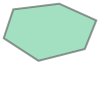

In [151]:
print(list(cells))
cell_to_shapely("82196ffffffffff")

In [43]:
import folium
import numpy as np
import h3
import random

# Sample heatmap data (replace with your own)
heatmap_data = np.random.rand(100, 2) * 10  # Assuming heatmap data is in the form of (latitude, longitude)

# Create a Folium map centered around the first heatmap point
m = folium.Map(location=heatmap_data[0], zoom_start=5)

# Create a HeatMap layer from the heatmap data
folium.plugins.HeatMap(heatmap_data).add_to(m)

# Define H3 resolution
h3_resolution = 7  # Adjust as needed

# Sample points from each H3 hexagon based on heatmap intensity
sampled_points = []
for point in heatmap_data:
    h3_index = h3.latlng_to_cell(point[0], point[1], h3_resolution)
    hex_boundary = h3.cell_to_boundary(h3_index)
    hex_center = np.mean(hex_boundary, axis=0)
    
    # Calculate normalized intensity within the hexagon (could use any other method)
    intensity = random.randint(1, 10)  # Adjust based on actual heatmap intensity
    
    # Sample a random point from the hexagon based on intensity
    sampled_point = np.random.uniform(hex_boundary[0], hex_boundary[2])
    sampled_points.append(sampled_point)

# Print sampled points
print("Sampled points:")
#for point in sampled_points:
#    print(point)

# Plot sampled points on the map as markers
for point in sampled_points:
    folium.Marker(location=[point[0], point[1]], icon=folium.Icon(color='red')).add_to(m)


m


Sampled points:


In [33]:
import numpy as np

# Sample heatmap data (replace with your own)
heatmap_data = np.random.rand(10, 10)

# Normalize heatmap intensity
heatmap_normalized = heatmap_data / np.sum(heatmap_data)

# Flatten the heatmap to make sampling easier
heatmap_flattened = heatmap_normalized.flatten()

# Sample points based on normalized intensity
num_points_to_sample = 5
sampled_indices = np.random.choice(range(len(heatmap_flattened)), num_points_to_sample, p=heatmap_flattened)

# Convert sampled indices back to row, column coordinates
sampled_points = [(index // heatmap_data.shape[1], index % heatmap_data.shape[1]) for index in sampled_indices]

print("Sampled points:")
for point in sampled_points:
    print(point)

Sampled points:
(4, 4)
(3, 8)
(0, 4)
(1, 9)
(5, 1)
